In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Cargar el dataset de casas de California
df = pd.read_feather('../data/03_model_input/california_housing_clean.ftr')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df.drop(columns='target')
y = df['target']

In [4]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 5 filas del dataset:")
df.head()


Dimensiones del dataset: (19128, 9)

Primeras 5 filas del dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,19128.000000,19128.000000,19128.000000,19128.000000,19128.000000,19128.000000,19128.000000,19128.000000,19128.000000
mean,3.667086,28.625209,5.189416,1.061785,1429.377196,2.935468,35.645933,-119.581095,1.927449
std,1.540468,12.442811,1.123154,0.110299,1061.452127,0.819692,2.143630,2.003572,0.974130
min,0.499900,1.000000,1.000000,0.333333,5.000000,0.970588,32.540000,-124.350000,0.149990
25%,2.526775,18.000000,4.408305,1.005025,806.000000,2.447562,33.930000,-121.790000,1.167000
50%,3.450550,29.000000,5.162897,1.047170,1183.000000,2.837330,34.270000,-118.510000,1.745000
75%,4.577575,37.000000,5.927836,1.095613,1738.000000,3.296437,37.720000,-118.010000,2.489000
max,15.000100,52.000000,10.352941,3.099338,16305.000000,33.952941,41.950000,-114.550000,5.000000


In [6]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [7]:
# 1. Estandarizar los datos antes de aplicar PCA
# Transforma cada variable para que tenga media 0 y desvest 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
#df_scaled.to_excel('paco.xlsx')


In [8]:
# 2. Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [9]:
# 3. Analizar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.25801853, 0.22522473, 0.15372772, 0.13994276, 0.11274299,
       0.07529655, 0.0290536 , 0.00599313])

In [10]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.25801853, 0.48324326, 0.63697097, 0.77691373, 0.88965672,
       0.96495327, 0.99400687, 1.        ])

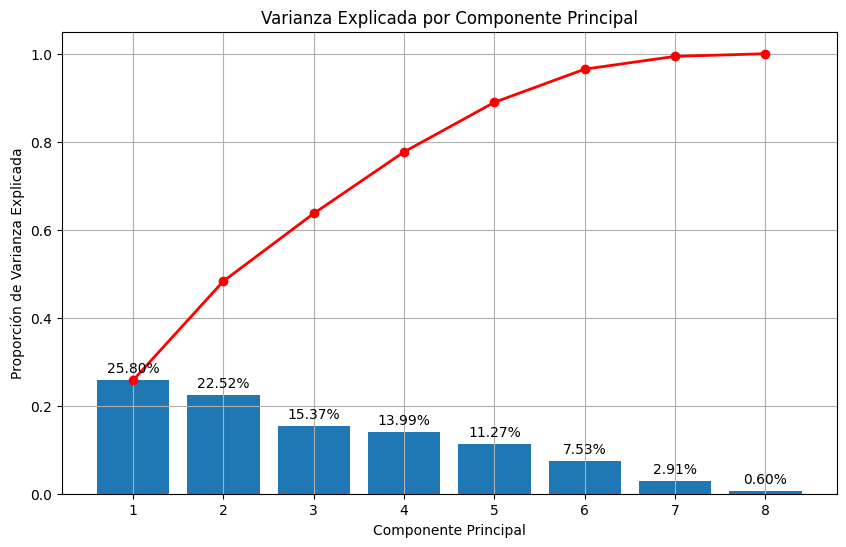

In [11]:
# Visualizar la varianza explicada por cada componente
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'r-o', linewidth=2)
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
# Añadir etiquetas de porcentaje a las barras
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{explained_variance_ratio[i]:.2%}', 
             ha='center', va='bottom', rotation=0)
plt.savefig('varianza_explicada_pca.png')
plt.show()    

In [12]:
# 4. Determinar el número óptimo de componentes
# Podemos elegir el número de componentes que expliquen al menos el 95% de la varianza
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNúmero de componentes para explicar al menos el 95% de la varianza: {n_components}")
print(f"Varianza acumulada explicada con {n_components} componentes: {cumulative_variance_ratio[n_components-1]:.4f}")


Número de componentes para explicar al menos el 95% de la varianza: 6
Varianza acumulada explicada con 6 componentes: 0.9650


In [13]:
# 5. Aplicar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

In [14]:
print(f"\nDimensión original del dataset: {X.shape}")
print(f"Dimensión después de PCA: {X_pca_optimal.shape}")


Dimensión original del dataset: (19128, 8)
Dimensión después de PCA: (19128, 6)


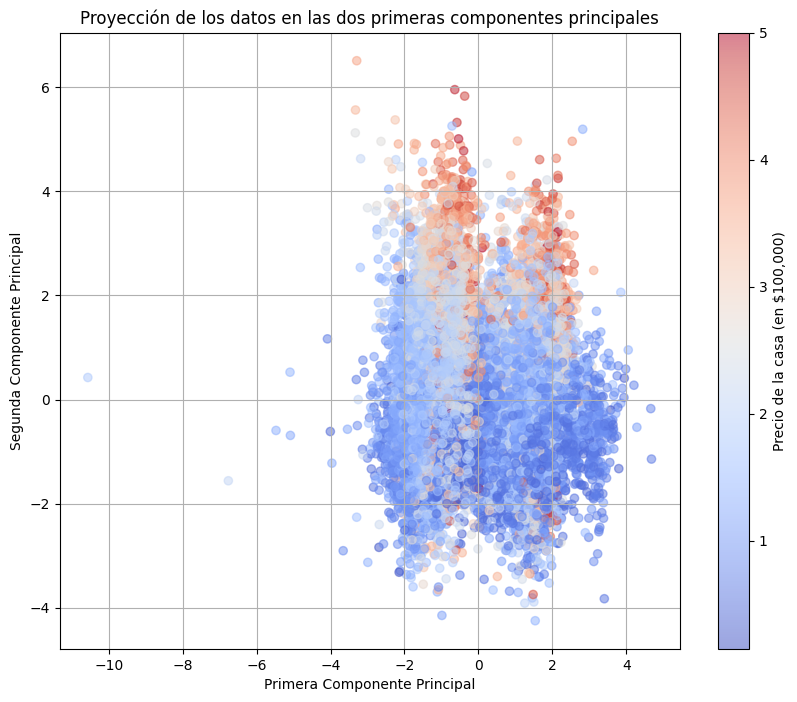

In [15]:
# 6. Visualizar los datos en las primeras 2 componentes principales
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.colorbar(scatter, label='Precio de la casa (en $100,000)')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Proyección de los datos en las dos primeras componentes principales')
plt.grid(True)
#plt.savefig('pca_scatter_plot.png')
plt.show()

In [16]:
# 7. Analizar la contribución de cada característica original a las componentes principales
loadings = pca.components_
feature_names = X.columns
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=feature_names)
print("\nContribución de cada característica a las componentes principales:")
loadings_df


Contribución de cada característica a las componentes principales:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
MedInc,0.056137,0.627261,-0.375913,-0.052011,-0.042460,0.145281,-0.626821,0.208716
HouseAge,0.049696,-0.421251,-0.517959,0.053593,0.225730,0.699834,0.058902,0.068789
AveRooms,0.194546,0.613486,-0.109459,0.212741,0.286209,0.129736,0.632097,-0.173936
AveBedrms,0.093218,-0.016857,0.530602,0.639576,0.361445,0.234640,-0.336220,0.041080
Population,-0.181085,0.204583,0.523145,-0.478776,-0.195483,0.615086,0.075327,0.015093
AveOccup,-0.244995,-0.000152,0.037399,-0.453198,0.830717,-0.180175,-0.102963,0.005966
Latitude,0.655285,-0.069539,0.139862,-0.203375,0.071762,-0.071377,0.130781,0.691010
Longitude,-0.652402,0.075843,-0.047398,0.253240,-0.035085,-0.036736,0.240117,0.664835


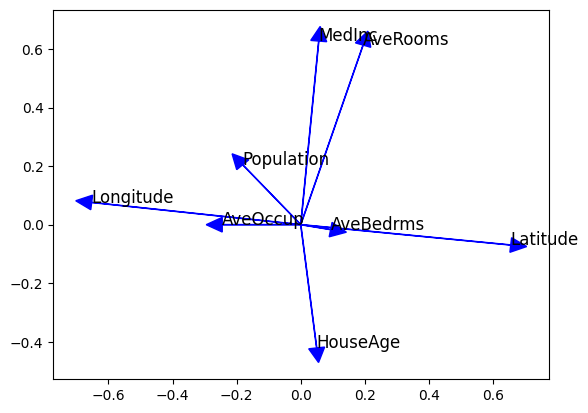

In [17]:
# Visualizar la contribución de cada característica a las dos primeras componentes principales
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(loadings[0, i], loadings[1, i], feature, fontsize=12)

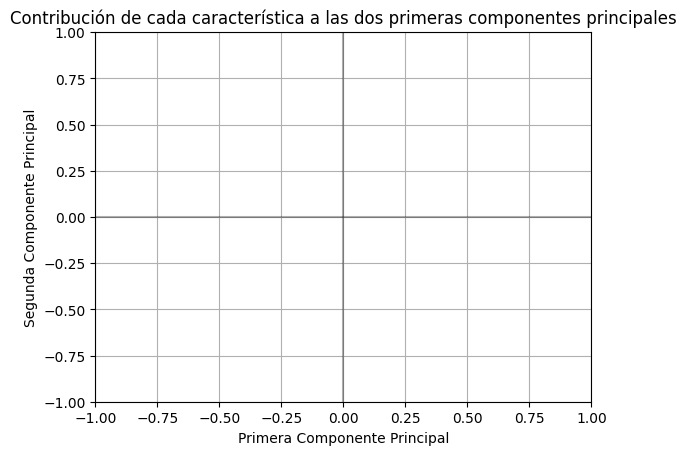

In [18]:
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Contribución de cada característica a las dos primeras componentes principales')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
#plt.savefig('pca_loadings.png')
plt.show()

In [19]:
# 8. Crear un DataFrame con las puntuaciones de PCA para análisis adicionales
pca_df = pd.DataFrame(
    X_pca_optimal, 
    columns=[f'PC{i+1}' for i in range(X_pca_optimal.shape[1])]
)
pca_df['PRICE'] = y

In [20]:
print("\nPrimeras 5 filas del dataset transformado con PCA:")
print(pca_df.head())


Primeras 5 filas del dataset transformado con PCA:
        PC1       PC2       PC3       PC4       PC5       PC6  PRICE
0  2.345945  2.077834 -2.364163  0.178553  0.369102  0.677843  4.526
1  1.861250  2.747538 -0.700100 -1.037389 -1.188811  0.657263  3.585
2  2.509457  2.009402 -2.354503  0.583511  1.310216  1.499848  3.521
3  2.091008  0.014119 -1.702432  0.279140  0.454822  1.153381  3.413
4  2.221108 -0.463661 -1.283883  0.673781  0.276303  1.139246  3.422


In [21]:
# 9. Correlación entre las componentes principales y el precio
correlations = pca_df.corr()['PRICE'].drop('PRICE')
print("\nCorrelación entre las componentes principales y el precio:")
print(correlations)


Correlación entre las componentes principales y el precio:
PC1    0.047781
PC2    0.400344
PC3   -0.361069
PC4    0.059116
PC5   -0.202169
PC6    0.270276
Name: PRICE, dtype: float64


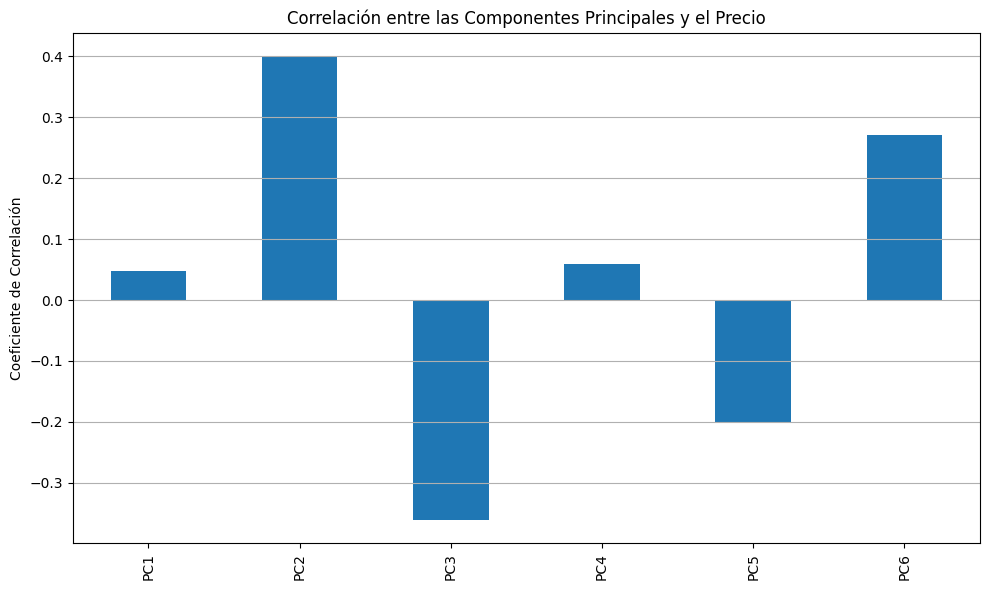

In [22]:
# Visualizar las correlaciones
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlación entre las Componentes Principales y el Precio')
plt.ylabel('Coeficiente de Correlación')
plt.grid(True, axis='y')
plt.tight_layout()
#plt.savefig('correlaciones_pca.png')
plt.show()

In [23]:
# 10. Reconstruir los datos originales a partir de las componentes principales
X_reconstructed = pca_optimal.inverse_transform(X_pca_optimal)
X_reconstructed = scaler.inverse_transform(X_reconstructed)

In [24]:
# Calcular el error de reconstrucción
reconstruction_error = np.mean((X - X_reconstructed) ** 2)
print(f"\nError cuadrático medio de reconstrucción: {reconstruction_error:.4f}")


Error cuadrático medio de reconstrucción: 187.3642


In [25]:
# Mostrar una comparación entre los valores originales y reconstruidos para una muestra
sample_idx = 0
comparison_df = pd.DataFrame({
    'Original': X.iloc[sample_idx],
    'Reconstruido': X_reconstructed[sample_idx],
    'Diferencia': X.iloc[sample_idx].values - X_reconstructed[sample_idx]
})

In [26]:
print("\nComparación entre valores originales y reconstruidos para la primera muestra:")
print(comparison_df)


Comparación entre valores originales y reconstruidos para la primera muestra:
              Original  Reconstruido  Diferencia
MedInc        8.325200      7.359917    0.965283
HouseAge     41.000000     41.479525   -0.479525
AveRooms      6.984127      7.684394   -0.700267
AveBedrms     1.023810      0.988536    0.035274
Population  322.000000    392.116375  -70.116375
AveOccup      2.555556      2.476527    0.079029
Latitude     37.880000     37.797880    0.082120
Longitude  -122.230000   -122.092481   -0.137519


In [27]:
# Conclusiones
print("\nConclusiones del análisis PCA:")
print(f"1. Hemos reducido la dimensionalidad de {X.shape[1]} a {n_components} componentes.")
print(f"2. Estas {n_components} componentes explican el {cumulative_variance_ratio[n_components-1]:.2%} de la varianza total.")
print("3. La primera componente principal está más correlacionada con {}.".format(
    feature_names[np.argmax(abs(loadings[0]))]
))
print("4. La segunda componente principal está más correlacionada con {}.".format(
    feature_names[np.argmax(abs(loadings[1]))]
))


Conclusiones del análisis PCA:
1. Hemos reducido la dimensionalidad de 8 a 6 componentes.
2. Estas 6 componentes explican el 96.50% de la varianza total.
3. La primera componente principal está más correlacionada con Latitude.
4. La segunda componente principal está más correlacionada con MedInc.
